# 9 Operacije sa listama i stringovima, strukture podataka

## 9.1 Podsetnik 

- Problemi sa domacim?

- Pogledati **8_advanced_liste_i_petlje_rekurzija.ipynb**

## 9.2 Operacije sa listama

- Do sada smo presli:
    - Indeksiranje
    - Slajsovanje
    - len()
    - append()
    - sort() i sorted()

- Sta je jos moguce? https://docs.python.org/3/tutorial/datastructures.html

In [ ]:
# Inicijalizacija liste odredjene duzine
lista = [6]*5
print(lista)

l1 = [1, 2, 3]
l2 = [4, 5, 6]

# Konkatenacija listi
l3 = l1 + l2
print(l3)

# Uklanjanje prvog pojavljivanja elementa x u listi
l3.remove(4)
print(l3)

# Pop-ovanje elementa iz liste. Ako se ne prosledi argument, vraca se poslednji element liste
last = l3.pop()
print(l3, last)
second = l3.pop(1)  # Obratiti paznju na indeks
print(l3, second)

# Praznjenje liste
l3.clear()
print(l3)

# Brojanje pojavljivanja elementa
l1 = [1, 2, 1, 3, 1, 4, 1]
print(l1.count(1))

[6, 6, 6, 6, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 5, 6]
[1, 2, 3, 5] 6
[1, 3, 5] 2
[]
4


## 9.3 Dodela vrednosti (assignment)

- Posto je lista slozen objekat, cesto je skupo praviti novi objekat u memoriji

- Stoga se u mnogim jezicima pravi razlika izmedju dodele vrednosti, plitkog i dubokog kopiranja objekta

- Dodela vrednosti postize se koriscenjem operatora = 

- Za proste tipove ovo radi ono sto se od njega ocekuje, ali kod listi mogu se javljaju cudni efekti

In [ ]:
a = 2
# Prosta dodela vrednosti
b = a

print(a, b)

b = 3

print(a, b) # Kao sto vidimo, sve je ocekivano


2 2
2 3


In [ ]:
# Medjutim

original = [[1, 2], [3, 4]]
assign = original

print(original, assign)   # So far, so good

assign[1] = 5

print(original, assign)   # Whuut?

[[1, 2], [3, 4]] [[1, 2], [3, 4]]
[[1, 2], 5] [[1, 2], 5]


- Kako bi se izbeglo dupliranje zauzete memorije, pri dodeli vrednosti kod kompleksnih objekata, prosto se vrsi dodela reference na vec postojeci objekat u memoriji

- Tako da sada **original** i **assign** sadrze reference na isti objekat u memoriji, i promenom jednog, menja se drugi

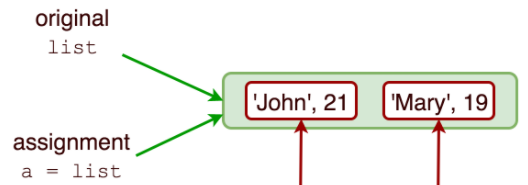

In [ ]:
print(hex(id(original)))
print(hex(id(assign)))      # Iste memorijske lokacije

0x7f9add6b06c8
0x7f9add6b06c8


## 9.4 Plitka kopija (shallow copy)

- Plitko kopiranje vrsi instanciranje novog objekta (liste) u memoriji, a potom u njega dodaje reference na objekte (elemente liste) iz originalnog objekta

- Ova funkcionalnost obezbedjena u biblioteci **copy**

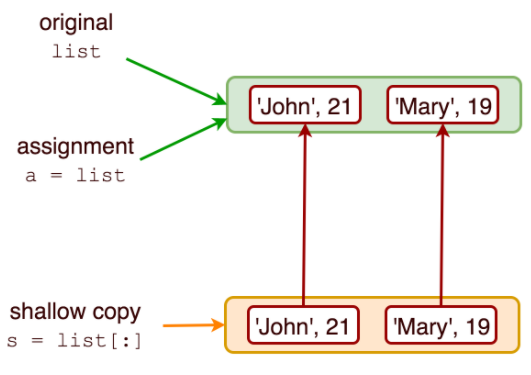

In [ ]:
# Negde u memoriji instancirana je lista sa dva 
# elementa koji su takodje liste sa dva elementa,
# i na tu listu referenciramo se preko promenljive
# 'original' koja je takodje negde u memoriji i
# i trenutno pokazuje na gorepomenutu listu
original = [[1, 2], [3, 4]]

import copy

# 'kopija' je promenljiva koja se instancira u memoriji
# Pozivanjem copy.copy(original) u memoriji se odvaja
# nov prostor u kome se kreira nova lista. Elementi
# te liste su reference na elemente liste 'original',
# ne neke novokreirane liste. Referenca na tu listu se
# stavlja u promenljivu 'kopija'
kopija = copy.copy(original)

# Pogledajmo da su original i kopija zaista razliciti objekti
# ali njihovi elementi pokazuju na iste memorijske lokacije
print(hex(id(original)))
print(hex(id(kopija)))

print(id(original[1]) == id(kopija[1]))
print()

# Sada kada modifikujemo objekat jedne liste, modifikacija
# ce se odslikati i u drugoj listi
kopija[0][0] = 10
original[1][1] = 20

print(original)
print(kopija)
print()

# Medjutim, treba imati na umu da mi i dalje mozemo promeniti
# bilo koju od listi a da to ne utice na drugu, jer su one
# nezavisni objekti, recimo
kopija.append(100)

print(original)
print(kopija)

0x7f9add6bc088
0x7f9add6b02c8
True

[[10, 2], [3, 20]]
[[10, 2], [3, 20]]

[[10, 2], [3, 20]]
[[10, 2], [3, 20], 100]


## 9.5 Duboka kopija (deep copy)

- Duboko kopiranje resava ove cudne nuspojave time sto u memoriji instancira i novu listu i objekte unutar liste, s tim sto ih inicijalizuje na iste vrednosti kao u originalnoj listi

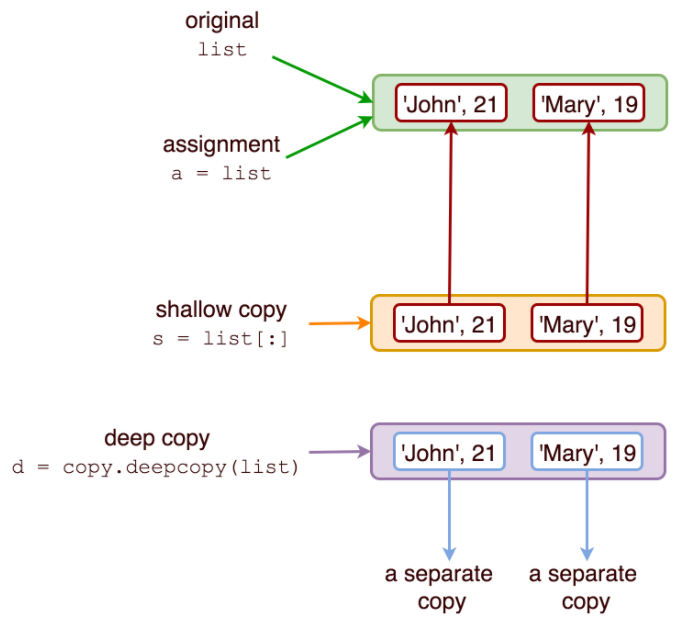

In [ ]:
original = [[1, 2], [3, 4]]

import copy

kopija = copy.deepcopy(original)

# Pogledajmo da su original i kopija zaista razliciti objekti
# kao i njihovi elementi
print(hex(id(original)))
print(hex(id(kopija)))

print(id(original[1]) == id(kopija[1]))
print()

# Sta god da uradimo sa jednom listom nece se odraziti na drugu

original.append(10)
kopija[0][0] = 'bla'
original[1] = '123'

print(original)
print(kopija)

0x7f9add6744c8
0x7f9add6bc088
False

[[1, 2], '123', 10]
[['bla', 2], [3, 4]]


- Ako je nejasno, potrazite na netu 

- https://stackoverflow.com/questions/17246693/what-is-the-difference-between-shallow-copy-deepcopy-and-normal-assignment-oper

- https://docs.python.org/2/library/copy.html

## 9.6 Operacije sa stringovima

- Posto su stringovi zapravo nizovi karaktera, mnoge operacije slicne operacijama sa listama mogu se izvesti

- Sledi pregled svih cesce koriscenih operacija od kojih smo neke i pominjali

In [ ]:
# f-string
variable = [x**2 for x in range(10)]
print(f"Vrlo je zgodan za ispis {variable}")
print()

# upper() i lower()
s = "qUiCk BrOwN fOx"
print(s.upper())
print(s.lower())
print()

# konkatenacija i umnozavanje
s1 = "Prvi deo recenice"
s2 = " drugi deo recenice"
s3 = s1 + s2
print(s3)
print(s3*3)
print()

# Deljenje na karaktere
s = "Dugacak niz karaktera"
print(list(s))
print()

# Deljenje separatorima
s = "Koliko para - toliko muzike"
print(s.split(" ")) # Seci na svaki razmak
print(s.split("-")) # Seci na -
print()

# join() metod za sastavljanje
s = "Hajde da svuda ubacimo po zarez"
", ".join(s.split())
print()

# len radi isto kao sa listama
s = "Dugacka recenica"
print(len(s))

Vrlo je zgodan za ispis [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

QUICK BROWN FOX
quick brown fox

Prvi deo recenice drugi deo recenice
Prvi deo recenice drugi deo recenicePrvi deo recenice drugi deo recenicePrvi deo recenice drugi deo recenice

['D', 'u', 'g', 'a', 'c', 'a', 'k', ' ', 'n', 'i', 'z', ' ', 'k', 'a', 'r', 'a', 'k', 't', 'e', 'r', 'a']

['Koliko', 'para', '-', 'toliko', 'muzike']
['Koliko para ', ' toliko muzike']


16


- Guglanjem mozete naci sve sto vam padne na pamet, jer je verovatno vec implementirano

- https://docs.python.org/2/library/string.html

## 9.7 Opseg vazenja

- Klizavo mesto cesto predstavljaju lokalne promenljive

- Definisanjem promenljive u okviru main bloka programa, ta promenljiva postaje **globalna** i dostupna svim ostalim delovima koda

- Medjutim, definisanje promenljive unutar tela funkcije cini tu promenljivu **lokalnom**

- Telo funkcije naziva se njenim **opsegom vazenja** (scope), a njeno trajanje - njenim **trajanjem** (lifetime)

- Ova promenljiva postoji samo lokalno dok smo unutar funkcije, nakon cega njeno vazenje prestaje i vise joj se ne moze pristupiti (u pozaditi, memorijska lokacija koja je bila rezervisana za nju, sada se oslobadja i stavlja na raspolaganje ostatku programa)

In [ ]:
# X postoji kao globalna, moze se dohvatiti odakle god
X = 'x globalno'

def fja():
    # Medjutim, Y postoji samo ovde, i cim izadjemo, nestace
    Y = 'y lokalno'

    print("Iz fje", X)
    print("Iz fje", Y)

print("Iz maina", X)
fja()
print("Iz maina", Y)


Iz maina x globalno
Iz fje x globalno
Iz fje y lokalno


NameError: ignored

## 9.8 Strukture podataka

- Strukture podataka predstavljaju slozene objekte sastavljene od jendostavnijih objekata sa ciljem da obezbedi neka kompleksna funkcionalnost

- U svim visim jezicima moguce je definisati koriscenjem OOP koncepata bilo kakvu strukturu podataka koja nam odgovara, kao i operacije koje ta struktura podrzava

In [ ]:
class Datum:
    def __init__(self, d, m, g):
        self.dan = d
        self.mesec = m
        self.godina = g

    def __repr__(self):
        return f"{self.dan}/{self.mesec}/{self.godina}"

danas = Datum(21, 11, 2020)

print(danas)

21/11/2020


- Medjutim, kroz sve jezike provlace se neke standardne strukture koje se cesto koriste pri nekim aplikacijama, a mi cemo za sad proci samo dve

## 9.9 Stack

- Stek je struktura koja predstavlja niz u koji se elementi smestaju po LIFO (Last In First Out) principu

- Ovo je jedna od fundamentalnih struktura, do te mere korisna da je podrzana na nivou kernela operativnog sistema, i neprestano koriscena (za smestanje promenljivih, za skakanje na funkcije, za cuvanje procesorski vaznih registara...)

- Postoji nekoliko varijanti implementacije, ali mi cemo se drzati proste implementacije preko listi

- Stek mora da podrzi sledece operacije:
        - empty() - proverava da li je stek prazan
        - size() - koliko elemenata ima na steku
        - push(e) - stavlja element na stek
        - pop() - skida element sa vrha steka

- Posto stek ima ogranicenu memoriju, mora se pratiti gde je pocetak, a gde kraj steka

- U slucaju da se pretera sa push()-ovanjem, javlja se **stack overflow**, a ako se pretera sa pop()-ovanjem, javlja se **stack underflow**

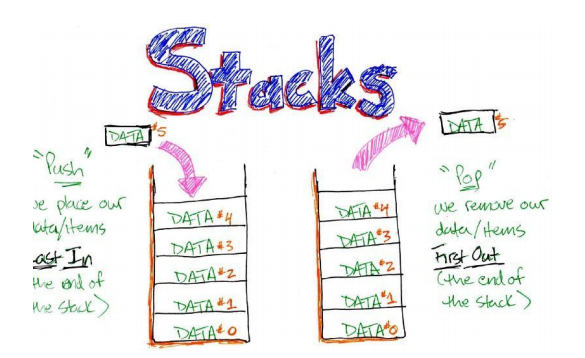

In [ ]:
class Stack:
    def __init__(self):
        self.s = []
        self.sz = 0
        self.max = 3

    def push(self, e):
        if (self.sz < 3):
            self.s.append(e)
            self.sz += 1
        else:
            raise Exception("Stack overflow!")

    def pop(self):
        if (self.sz > 0):
            self.sz -= 1
            return self.s.pop()
        else:
            raise Exception("Stack underflow!")

    def size(self):
        return self.sz

    def empty(self):
        return True if self.sz == 0 else False

    def __repr__(self):
        return str(self.s)

In [ ]:
# Kreiramo prazan stek
stek = Stack()
print(stek.empty())

# Dodajemo elemente
stek.push(1)
stek.push(2)
stek.push(3)
print(stek.size())
print(stek)

# Skidamo element sa vrha
vrh = stek.pop()
print(vrh, stek)

# Ako probamo da popnemo jos dva elementa, preteracemo
stek.push(4)
stek.push(5)

True
3
[1, 2, 3]
3 [1, 2]


Exception: ignored

In [ ]:
print(stek)

stek.pop()
stek.pop()
stek.pop()
stek.pop()

[1, 2, 4]


Exception: ignored

## 9.10 Queue

- Queue (red za cekanje) je struktura slicna steku, samo sto implementira FIFO (First In First Out) princip

- **enqueue()** je operacija dodavanja elementa na kraj reda

- **dequeue()** je operacija skidanja elementa sa pocetka reda

- Ovu strukturu cemo implementirati kada budemo radili OOP 

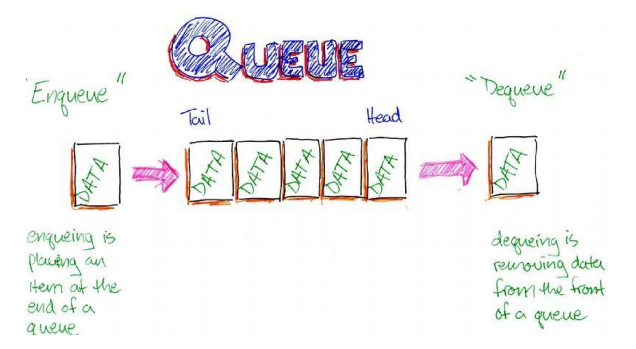

## 9.11 Domaci 

1. Sa standardnog ulaza unosi se aritmetički izraz u obliku stringa: npr. “2+3*(5 - 2)”. Napisati program koji proverava da li su zagrade pravilno uparene. Koristiti stack implementiran uz pomoć liste. Napisati pomoćne funkcije koje primaju listu kao jedan argument i znaju da implementiraju push, pop, empty i size operacije. Nema potrebe za koriscenjem OOP koncepata, sve uraditi preko liste i pomocnih funkcija. Dole ce biti data funkcija koja implementira pop operaciju.

```
# Primer nepravilno uparenih zagrada

"2+3*(5-2))"

# ili

"2+3*(5-2)("
```


In [ ]:
# Pomoc: implementirana fja pop() koja prima listu i vraca element sa vrha
# Prosto listu koja se koristi kao stek instancirati kao 'stek = []' i njega 
# prosledjivati implementiranim funkcijama i sve ce izgledati kao da se radi 
# o pravom steku
def pop(stek):  # 'stek' je zapravo lista
    if size(stek) > 0:   # Napraviti funkciju size koja vraca velicinu steka 
        return stek[-1]
    else:
        print("Stack underflow!")